In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### 1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

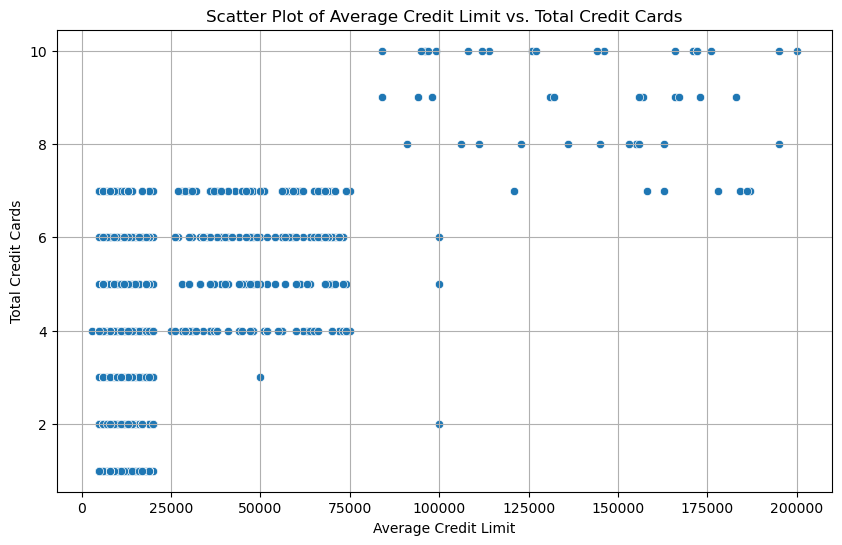

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards')
plt.title('Scatter Plot of Average Credit Limit vs. Total Credit Cards')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.grid(True)


The scatter plot shows that the data distribution cannot be considered linear. The points are spread in clusters at different levels of total credit cards, with average credit limits varying widely within each group. There is no clear upward or downward straight-line trend, indicating that the relationship is not linear but rather better suited for clustering analysis.

#### 2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

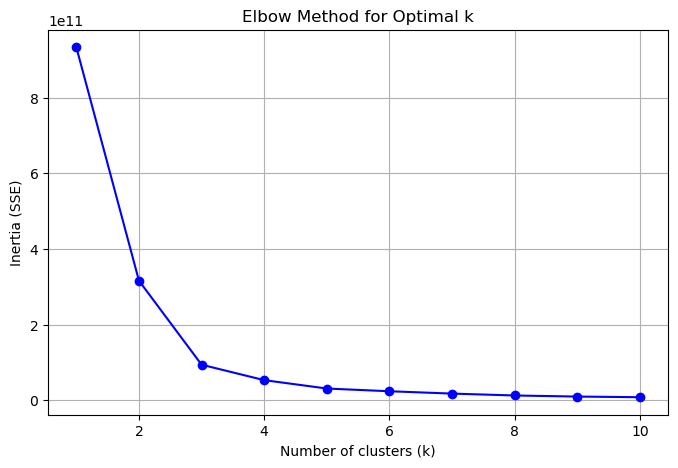

In [8]:
# Select features
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

# Elbow Method
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


Based on the SSE line plot for each k, we can argue that the best value of k is 3. Why k=3? This is because at k=2, the SSE value is still too high compared to k=4, while at k=8, the SSE becomes very low. After observing the Elbow Curve, it is clear that the inertia (SSE) decreases sharply from $k = 1$ to $k = 3$. This indicates that adding more clusters within this range significantly improves the model by reducing within-cluster variation. However, after $k = 3$, the slope of the curve begins to flatten, showing that the additional reduction in SSE becomes smaller. Starting from $k = 4$ onwards, the improvement is minimal and does not justify the increase in the number of clusters. Therefore, the optimal number of clusters for this dataset is determined to be **$k = 3$**.


#### 3. Visualize the clustering results from the K-Means model using a scatter plot.

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


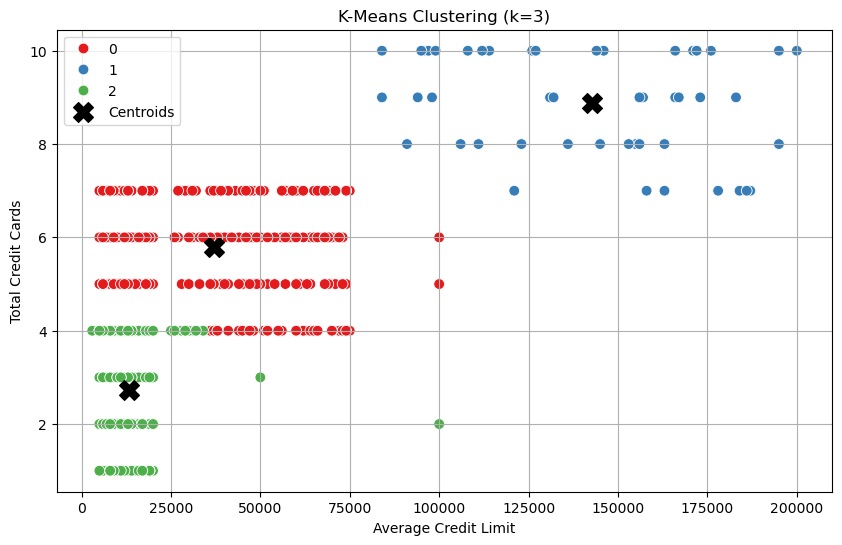

In [11]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot clustering results
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='Avg_Credit_Limit', 
    y='Total_Credit_Cards', 
    hue='Cluster', 
    palette='Set1', 
    s=60
)
plt.scatter(
    centers[:, 0], centers[:, 1], 
    c='black', s=200, marker='X', label='Centroids'
)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.legend()
plt.grid(True)
plt.show()


#### 4. Build a clustering model using DBSCAN with all available variables.

In [14]:

# Select all numeric columns for clustering
X_all = df.select_dtypes(include=['int64', 'float64'])

# Scale
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)  # you can tune eps and min_samples
dbscan_labels = dbscan.fit_predict(X_all_scaled)

df['DBSCAN_Cluster'] = dbscan_labels

# Show cluster distribution
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    606
 1     41
-1     13
Name: count, dtype: int64


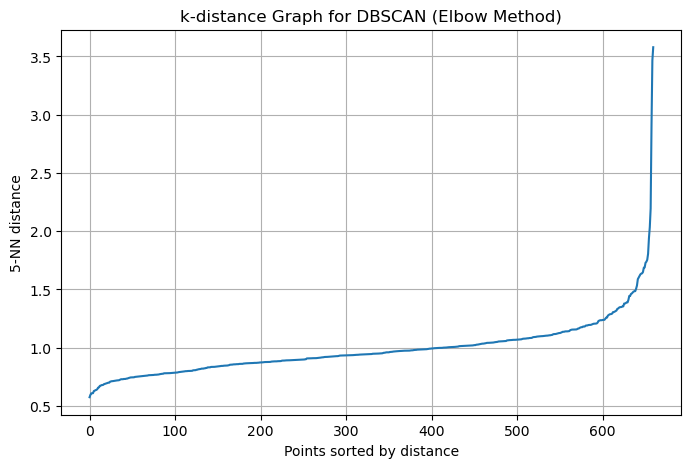

In [15]:
# Use Nearest Neighbors to find distances
neigh = NearestNeighbors(n_neighbors=5)  # min_samples = 5
nbrs = neigh.fit(X_all_scaled)
distances, indices = nbrs.kneighbors(X_all_scaled)

# Sort the distances for k-distance graph
distances = np.sort(distances[:, 4]) 
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5-NN distance")
plt.title("k-distance Graph for DBSCAN (Elbow Method)")
plt.grid(True)
plt.show()


From the k-distance graph, the curve remains relatively smooth until approximately eps = 1.5, after which it begins to rise sharply. This elbow point indicates the optimal distance threshold to separate dense clusters from noise. Choosing eps around 1.5 ensures that points within clusters remain tightly grouped while minimizing the inclusion of noise. Thus, for this dataset, the optimal eps value for DBSCAN is determined to be 1.5.

In [18]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_all_scaled)
df['DBSCAN_Cluster'] = labels

In [19]:
mask = labels != -1
if len(np.unique(labels[mask])) > 1:
    sil_score = silhouette_score(X_all_scaled[mask], labels[mask])
    dbi_score = davies_bouldin_score(X_all_scaled[mask], labels[mask])
    print("Silhouette Score:", sil_score)
    print("Davies–Bouldin Index (DBI):", dbi_score)
else:
    print("Not enough clusters formed for evaluation.")

Silhouette Score: 0.45413036719082706
Davies–Bouldin Index (DBI): 0.7813042461163189
